In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
import statsmodels.api as sm

In [93]:
df = pd.read_csv("Data/perrin-freres-monthly-champagne-.csv")

In [94]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [95]:
#Now we need to clean up the data and convert the Month field to Date_Time Format 
df.columns=['Month','Sales']
#Remove null colums
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)
df['Month'] = pd.to_datetime(df['Month'])

In [96]:
#Now we set the Month column as index
df.set_index('Month',inplace=True)

In [97]:
df.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


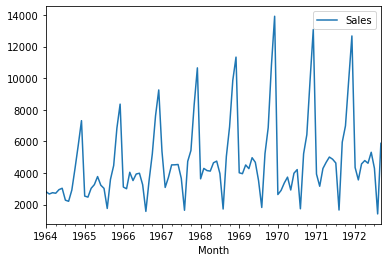

In [98]:
df.plot()

In [99]:
# From the above graph we can clearly see that the data is not stationary. 
# In order to make the data stationary we have to use differencing.
# We find the difference in sales for each month by shifting and then plot the graph.
df['Sales First Difference'] = df['Sales']-df['Sales'].shift(1)
# Differencing for 12 months will give us the seasonal differencing
df['Seasonal First Difference'] = df['Sales']-df['Sales'].shift(12)

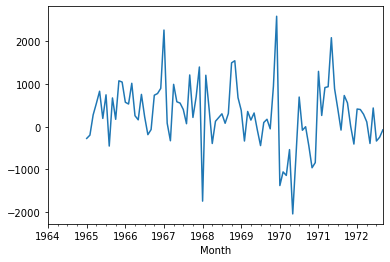

In [100]:
df['Seasonal First Difference'].plot()

In [101]:
# The Dicky Fuller test can be used to determine if the data is stationary or not. 
from statsmodels.tsa.stattools import adfuller
def dfuller(series):
    dftest = adfuller(series, autolag='AIC')
    values_names = ['Test Statistic','p-value','no. of lags Used','Number of Observations Used']
    for value_name,value in list(zip(values_names,dftest)):
        print(value_name,': ', value)
    print('critical values: ',dftest[4])

In [104]:
dfuller(df['Seasonal First Difference'].iloc[13:])

Test Statistic :  -7.6096839425892595
p-value :  2.2725535600890473e-11
no. of lags Used :  0
Number of Observations Used :  91
critical values:  {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}


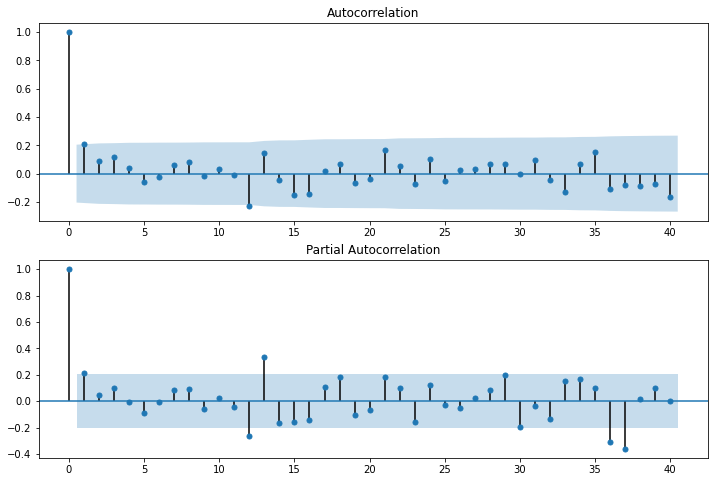

In [105]:
# We can see that the time series is now stationary, as the test statistic is much less than the 1 percent critical value. 
# This means that we are more than 99% confident that the time series is stationary.
# Now we use Partial Auto Correlation and Auto Correlation to find appropriate lag values to use in our Auto Regressive Model
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [106]:
# As you can see, that there are only a few significant values in both the ACF and the PACF. 
# Both the PACF and ACF drop off suddenly, perhaps suggesting a mix of AR and MA models. 
# BUILDING OUR MODEL: Since the data we're dealing with is seasonal, it's best to create a SARIMAX model
# instead of a ARIMA Model. 
""""""

''

In [107]:
""""
An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the Auto Regressive term

q is the order of the Moving Average term

d is the number of differencing required to make the time series stationary

From the above PACF and ACF graphs, we can conclude that it is best to use p = 1, q = 1 and d=1 

"""

'"\nAn ARIMA model is characterized by 3 terms: p, d, q\n\nwhere,\n\np is the order of the Auto Regressive term\n\nq is the order of the Moving Average term\n\nd is the number of differencing required to make the time series stationary\n\nFrom the above PACF and ACF graphs, we can conclude that it is best to use p = 1, q = 1 and d=1 \n\n'

In [108]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\vamsi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\vamsi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


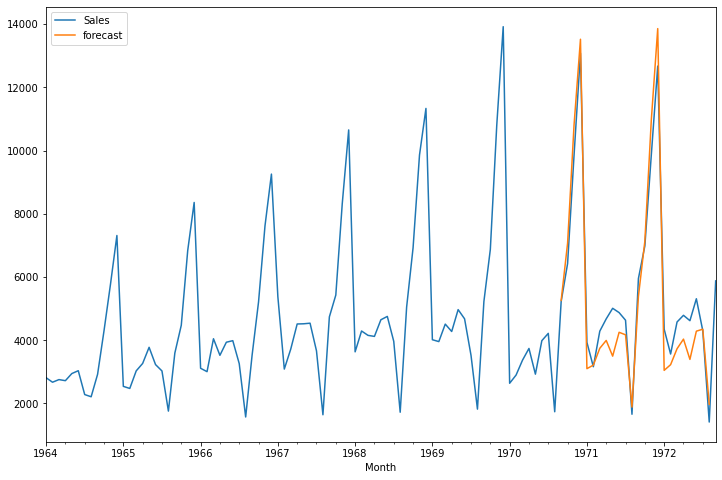

In [113]:
df['forecast']=results.predict(start=80, end = 103, dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

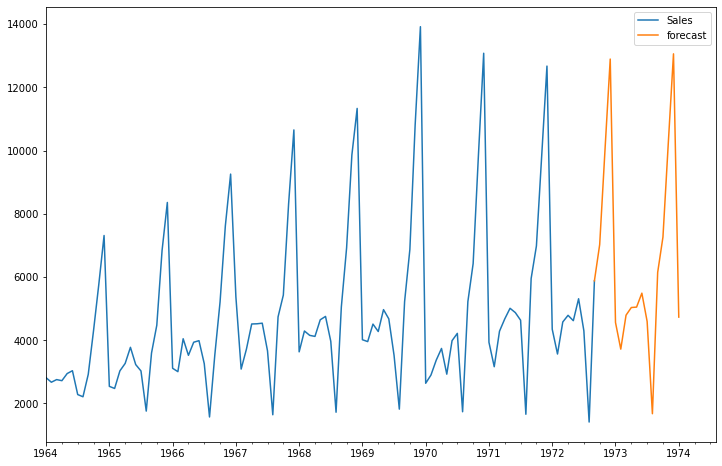

In [116]:
# As you can see above, the prediction is fairly accurate with reference to the test data. 
# Now that we know our model is working we can use it to predict future sales for the next two years (24 Months)

future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])
future_df['forecast']=results.predict(start=104, end = 120, dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [117]:
# From the graph above, you can see that we have an accurate estimation of the sales of Perrin Freres Champagne 
# for the next two years !!!
"""
The procedure  I have used is as follows:-

Imported the dataset.
Built a train and test set.(df['Season First Diffrence'] = train and df['Sales'] = test)
Checked for stationarity in data.
Made the data stationary.
Built the models.
Validated the model with test set.

"""

"\nThe procedure  I have used is as follows:-\n\nImported the dataset.\nBuilt a train and test set.(df['Season First Diffrence'] = train and df['Sales'] = test)\nChecked for stationarity in data.\nMade the data stationary.\nBuilt the models.\nValidated the model with test set.\n\n"